In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('pima-indians-diabetes.data.csv')

In [4]:
dataset.head(2)

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1


In [5]:
dataset.describe(include='all')

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


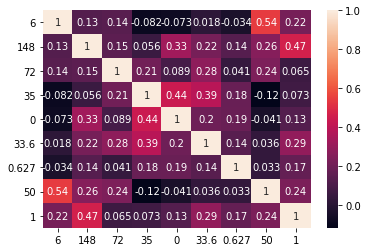

In [7]:
sns.heatmap(dataset.corr(), annot=True)

In [8]:
# creating input features and target variables
X= dataset.iloc[:,0:8]
y= dataset.iloc[:,8]

In [9]:
X.head(2)

,6,148,72,35,0,33.6,0.627,50
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32


In [10]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.84372629, -1.12208597, -0.16024856, ..., -0.68372895,
        -0.36426474, -0.18894038],
       [ 1.23423997,  1.94447577, -0.26357823, ..., -1.10230105,
         0.60470064, -0.1037951 ],
       [-0.84372629, -0.99692019, -0.16024856, ..., -0.49346891,
        -0.91968415, -1.0403932 ],
       ...,
       [ 0.343683  ,  0.0044061 ,  0.14974046, ..., -0.73446496,
        -0.68423462, -0.27408566],
       [-0.84372629,  0.16086333, -0.47023757, ..., -0.23978884,
        -0.37030191,  1.17338414],
       [-0.84372629, -0.8717544 ,  0.04641078, ..., -0.20173684,
        -0.47293375, -0.87010264]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [14]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=8))

#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))

#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [15]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [16]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.6893 - acc: 0.6399
Epoch 2/100
536/536 [==============================] - 0s 155us/step - loss: 0.6781 - acc: 0.6418
Epoch 3/100
536/536 [==============================] - 0s 149us/step - loss: 0.6527 - acc: 0.6418
Epoch 4/100
536/536 [==============================] - 0s 152us/step - loss: 0.6091 - acc: 0.6418
Epoch 5/100
536/536 [==============================] - 0s 150us/step - loss: 0.5628 - acc: 0.6586
Epoch 6/100
536/536 [==============================] - 0s 163us/step - loss: 0.5280 - acc: 0.7463
Epoch 7/100
536/536 [==============================] - 0s 152us/step - loss: 0.5048 - acc: 0.7780
Epoch 8/100
536/536 [==============================] - 0s 147us/step - loss: 0.4893 - acc: 0.7817
Epoch 9/100
536/536 [==============================] - 0s 153us/step - loss: 0.4768 - acc: 0.7873
Epoch 10/100
536/536 [==============================] - 0s 154us/step - loss: 0.4685 - acc: 0.7948
Epoch 11/100
536/536 

In [17]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

536/536 [==============================] - 0s 122us/step


[0.4189583632483411, 0.8134328349312739]

In [18]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[125  31]
 [ 31  44]]
